# Flight Price Prediction

## Data Preprocessing

In [1]:
#importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the provided dataset

flight_data = pd.read_csv('Flight_Price.csv')
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# Checking the shape of the dataset
flight_data.shape

(10683, 11)

In [4]:
# Checking the datatypes in the dataset
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
flight_data['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [6]:
# Clean the data by removing missing or duplicate entries.
flight_data.dropna(inplace = True)

In [7]:
flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
flight_data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## Data Preparation

In [9]:
# Merging the Cities New Delhi and Delhi as Delhi as they are same
flight_data['Destination'] = np.where(flight_data['Destination'] == 'New Delhi', 'Delhi', flight_data['Destination'])

In [10]:
# Convert date and time columns into standard formats.

flight_data['Journey_day'] = pd.to_datetime(flight_data['Date_of_Journey'], format="%d/%m/%Y").dt.day
flight_data['Journey_month'] = pd.to_datetime(flight_data['Date_of_Journey'], format="%d/%m/%Y").dt.month
flight_data.drop('Date_of_Journey',inplace=True,axis=1)

In [11]:
flight_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
flight_data["Dep_hour"] = pd.to_datetime(flight_data["Dep_Time"]).dt.hour

# Extracting Minutes
flight_data["Dep_min"] = pd.to_datetime(flight_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
flight_data.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_19064\3429375549.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_data["Dep_hour"] = pd.to_datetime(flight_data["Dep_Time"]).dt.hour
C:\Users\user\AppData\Local\Temp\ipykernel_19064\3429375549.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_data["Dep_min"] = pd.to_datetime(flight_data["Dep_Time"]).dt.minute


In [13]:
flight_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [14]:
# Similar to Dep_Time, we can extract values from Arrival_Time

# Extracting Hours
flight_data["Arrival_hour"] = pd.to_datetime(flight_data.Arrival_Time).dt.hour

# Extracting Minutes
flight_data["Arrival_min"] = pd.to_datetime(flight_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
flight_data.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_19064\3814855926.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_data["Arrival_hour"] = pd.to_datetime(flight_data.Arrival_Time).dt.hour
C:\Users\user\AppData\Local\Temp\ipykernel_19064\3814855926.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_data["Arrival_min"] = pd.to_datetime(flight_data.Arrival_Time).dt.minute


In [15]:
# Assigning and converting Duration column into list
duration = list(flight_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [16]:
# Adding duration_hours and duration_mins list to flight_data dataframe

flight_data["Duration_hours"] = duration_hours
flight_data["Duration_mins"] = duration_mins

In [17]:
flight_data.drop(["Duration"], axis = 1, inplace = True)
flight_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [18]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_day      10682 non-null  int32 
 8   Journey_month    10682 non-null  int32 
 9   Dep_hour         10682 non-null  int32 
 10  Dep_min          10682 non-null  int32 
 11  Arrival_hour     10682 non-null  int32 
 12  Arrival_min      10682 non-null  int32 
 13  Duration_hours   10682 non-null  int64 
 14  Duration_mins    10682 non-null  int64 
dtypes: int32(6), int64(3), object(6)
memory usage: 1.1+ MB


## Handling Categorical Data

In [19]:
flight_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

### Plotting Airline Vs Price

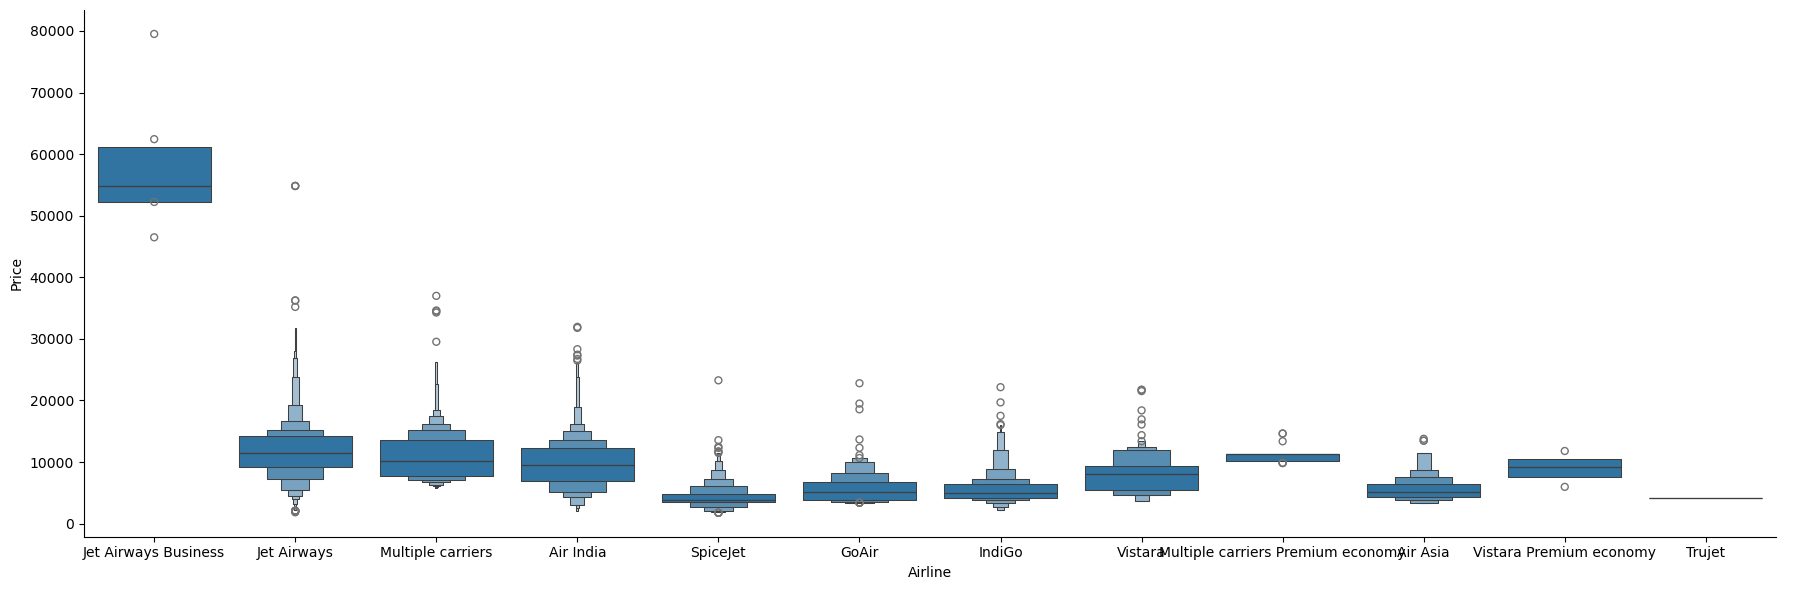

In [20]:
sns.catplot(y = "Price", x = "Airline", data = flight_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

The above plot shows that `Jet Airways Business` is the costliest airline.

## Encoding Categorical Variables

####  Creating Dummy Columns out of the `Airline` Column

In [22]:
## As Airline is Nominal Categorical data we will perform OneHotEncoding


airline = flight_data[['Airline']]     
airline = pd.get_dummies(airline,drop_first=True,dtype='int')

In [23]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Airline_Air India                          10682 non-null  int32
 1   Airline_GoAir                              10682 non-null  int32
 2   Airline_IndiGo                             10682 non-null  int32
 3   Airline_Jet Airways                        10682 non-null  int32
 4   Airline_Jet Airways Business               10682 non-null  int32
 5   Airline_Multiple carriers                  10682 non-null  int32
 6   Airline_Multiple carriers Premium economy  10682 non-null  int32
 7   Airline_SpiceJet                           10682 non-null  int32
 8   Airline_Trujet                             10682 non-null  int32
 9   Airline_Vistara                            10682 non-null  int32
 10  Airline_Vistara Premium economy            10682 no

Here, the categorical column `Airline` is now converted into 'int' datatype

### Plotting Source Vs Price

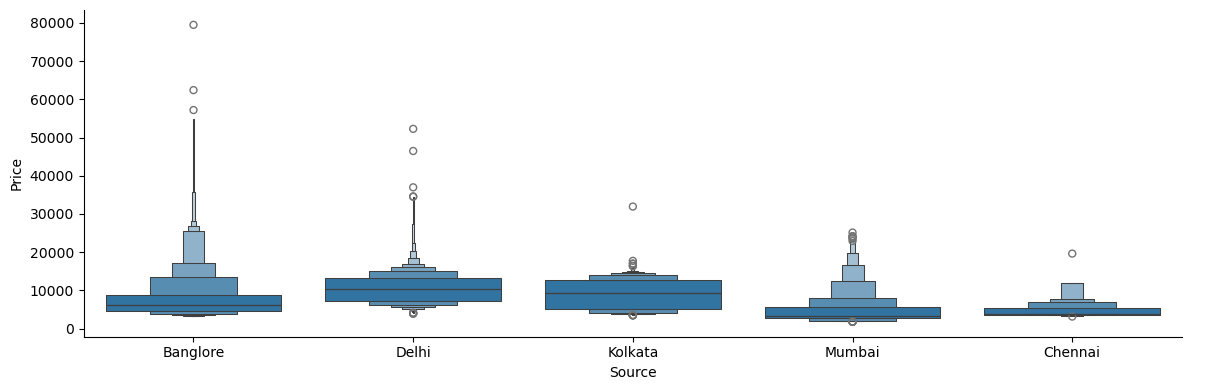

In [24]:
sns.catplot(x = "Source",y = "Price", data= flight_data.sort_values("Price", ascending=False), kind = "boxen", height = 4, aspect = 3)
plt.show()

In [ ]:
The plot above indicates that flights departing from Bangalore consistently have the highest ticket prices compared to other cities.

#### Creating Dummy Columns out of the `Source` Column

In [26]:
Source = flight_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True, dtype = 'int')
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [27]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Source_Chennai  10682 non-null  int32
 1   Source_Delhi    10682 non-null  int32
 2   Source_Kolkata  10682 non-null  int32
 3   Source_Mumbai   10682 non-null  int32
dtypes: int32(4)
memory usage: 250.4 KB


Here, the categorical column `Source` is now converted into 'int' datatype

### Plotting Destination Vs Price

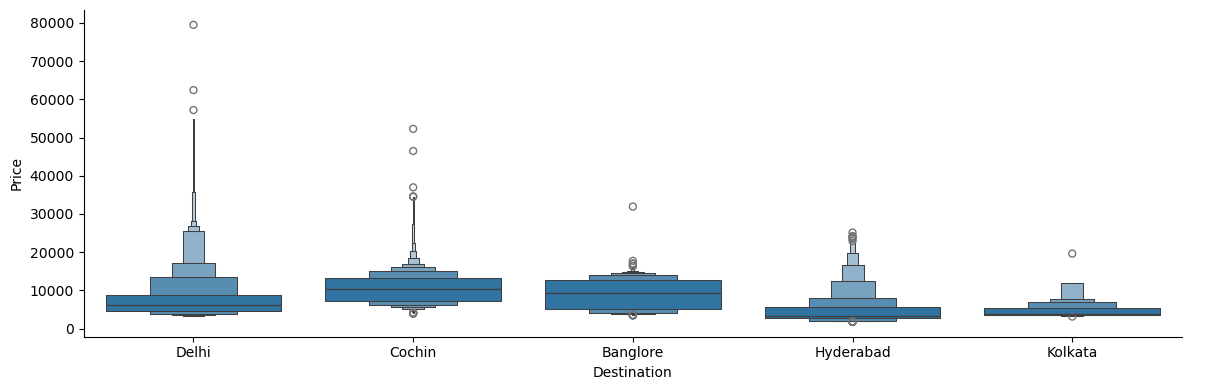

In [28]:
sns.catplot(x='Destination',y='Price',data=flight_data.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=4)

The plot above shows that flights to New Delhi tend to have the highest ticket prices compared to other destinations.

#### Creating Dummy Columns out of the `Destination` Column

In [30]:
destination = flight_data[['Destination']]
destination = pd.get_dummies(destination,drop_first=True,dtype='int')
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [31]:
destination.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Destination_Cochin     10682 non-null  int32
 1   Destination_Delhi      10682 non-null  int32
 2   Destination_Hyderabad  10682 non-null  int32
 3   Destination_Kolkata    10682 non-null  int32
dtypes: int32(4)
memory usage: 250.4 KB


Here, the categorical column Destination is now converted into 'int' datatype

#### Dropping unwanted Columns

In [33]:
flight_data.drop(['Route','Additional_Info'],inplace=True,axis=1)
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,16,50,21,35,4,45


### Checking values in `Total_Stops` column

In [35]:
flight_data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

Converting labels into numbers in the Total_Stops column.

In [36]:
flight_data['Total_Stops'].replace({'non-stop': 0,'1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops':4},inplace=True)
flight_data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_19064\3971512552.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flight_data['Total_Stops'].replace({'non-stop': 0,'1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops':4},inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_19064\3971512552.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('f

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45


### Checking the shapes of the four dataframes 

In [39]:
print('Shape of airline Dataframe is: ',airline.shape)
print('Shape of Source Dataframe is: ',Source.shape)
print('Shape of destination Dataframe is: ',destination.shape)
print('Shape of Flight Data Dataset is: ',flight_data.shape)

Shape of airline Dataframe is:  (10682, 11)
Shape of Source Dataframe is:  (10682, 4)
Shape of destination Dataframe is:  (10682, 4)
Shape of Flight Data Dataset is:  (10682, 13)


All 4 data frames have the same number of rows, so, we can join them.

### Combining all the dataframes

Dropping the `Airline`, `Source`, `Destination` columns as, the dummy columns have been created already for them.

In [40]:
flight_data_new = pd.concat([flight_data,airline,Source,destination],axis=1)
flight_data_new.drop(['Airline','Source','Destination'],axis=1,inplace=True)
flight_data_new.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


In [41]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   Journey_day                                10682 non-null  int32
 3   Journey_month                              10682 non-null  int32
 4   Dep_hour                                   10682 non-null  int32
 5   Dep_min                                    10682 non-null  int32
 6   Arrival_hour                               10682 non-null  int32
 7   Arrival_min                                10682 non-null  int32
 8   Duration_hours                             10682 non-null  int64
 9   Duration_mins                              10682 non-null  int64
 10  Airline_Air India                          10682 no

# Training the Data

In [58]:
X = flight_data_new.drop('Price', axis=1)
X.head()
X.to_csv('Clean_data.csv')

In [48]:
X.isnull().sum()

Total_Stops                                  0
Journey_day                                  0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi 

In [49]:
y = flight_data_new['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

### Checking Correlations between the columns after Data Preparation

<Axes: >

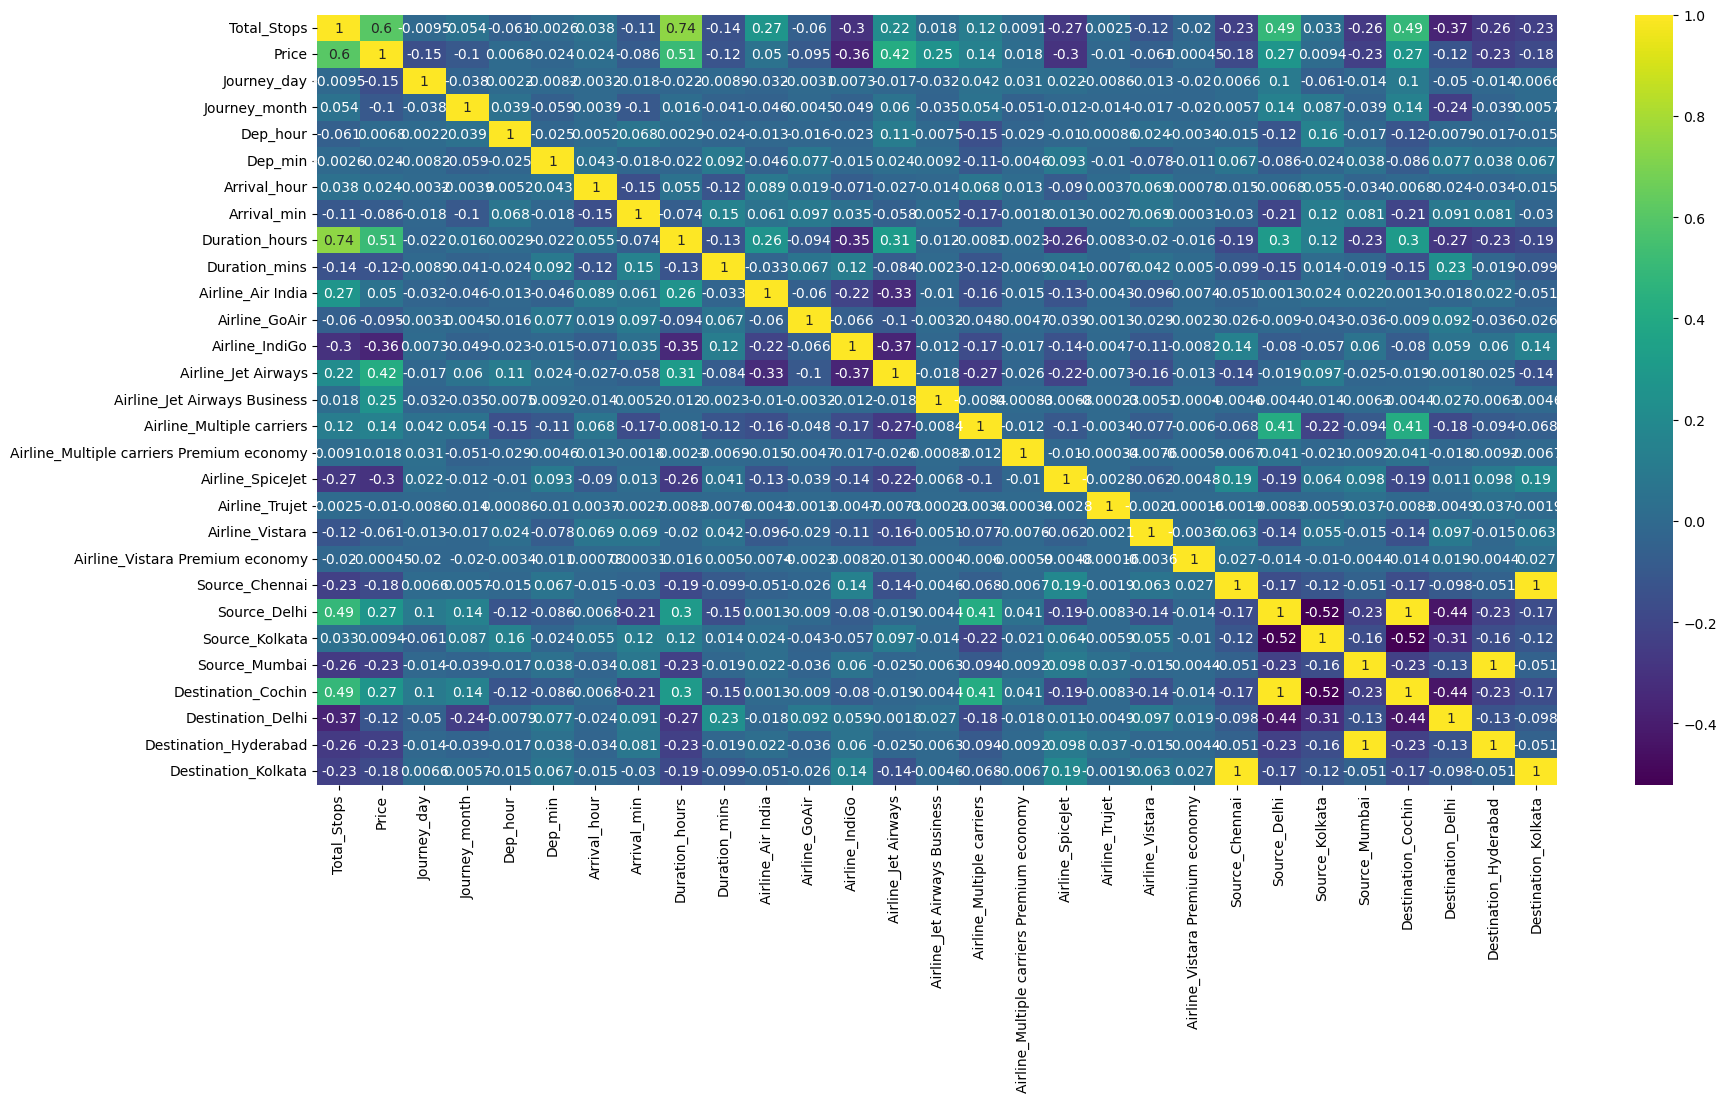

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(flight_data_new.corr(),cmap = 'viridis', annot=True)

## Train Test Split

Splitting the training and testing data set into a 70:30 ratio.

70% of the data will be used for training the model 
30% of the data will be used for testing the accuracy of our built model

Using random_state=42 guarantees that this split is reproducible, meaning we will get consistent results every time we run our model on the same dataset.

# Model Training

We will be using 5 machine learning models to train our dataset:

* Linear Regression Model
* K Neighbors Regressor
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Regressor
* XGB Regressor

# Linear Regression 

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define independent variables (X) and target variable (y)
X = flight_data_new.drop('Price', axis=1)
y = flight_data_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and Train the Linear Regression Model
lreg_model = LinearRegression()
lreg_model.fit(X_train, y_train)

# Predict on the Test Set
lreg_y_pred = lreg_model.predict(X_test)

# Evaluate the Model
lreg_mae = mean_absolute_error(y_test, lreg_y_pred)
lreg_mse = mean_squared_error(y_test, lreg_y_pred)
lreg_r2 = r2_score(y_test, lreg_y_pred)
train_score = lreg_model.score(X_train, y_train)
test_score = lreg_model.score(X_test, y_test)

# Print the Evaluation Metrics
print(f"Linear Regression - MAE: {lreg_mae}, MSE: {lreg_mse}, R²: {lreg_r2}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")


Linear Regression - MAE: 1995.9354834915582, MSE: 8625736.13693895, R²: 0.5999576289357331
Train Score: 0.6137360978467021
Test Score: 0.5999576289357331


# K Neighbors Regressor

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define the independent variables (X) and target variable (y)
X = flight_data_new.drop('Price', axis=1)
y = flight_data_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test set
knn_y_pred = knn_model.predict(X_test)

# Evaluate the model
knn_mae = mean_absolute_error(y_test, knn_y_pred)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
train_score = knn_model.score(X_train, y_train)
test_score = knn_model.score(X_test, y_test)

print(f"KNN Regressor - MAE: {knn_mae}, MSE: {knn_mse}, R²: {knn_r2}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")


KNN Regressor - MAE: 1878.7021993448761, MSE: 9136047.189050071, R²: 0.5762905424371565
Train Score: 0.7347481409551782
Test Score: 0.5762905424371565


# Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define the independent variables (X) and target variable (y)
X = flight_data_new.drop('Price', axis=1)
y = flight_data_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
dtr_model = DecisionTreeRegressor(random_state=42)
dtr_model.fit(X_train, y_train)

# Predict on the test set
dtr_y_pred = dtr_model.predict(X_test)

# Evaluate the model
dtr_mae = mean_absolute_error(y_test, dtr_y_pred)
dtr_mse = mean_squared_error(y_test, dtr_y_pred)
dtr_r2 = r2_score(y_test, dtr_y_pred)
train_score = dtr_model.score(X_train, y_train)
test_score = dtr_model.score(X_test, y_test)

print(f"dtr Regressor - MAE: {dtr_mae}, MSE: {dtr_mse}, R²: {dtr_r2}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")


dtr Regressor - MAE: 1331.4882623615663, MSE: 5839293.814728461, R²: 0.7291865985812713
Train Score: 0.9692484150527355
Test Score: 0.7291865985812713


# Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define independent variables (X) and target variable (y)
X = flight_data_new.drop('Price', axis=1)
y = flight_data_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train, y_train)

# Predict on the test set
rfr_y_pred = rfr_model.predict(X_test)

# Evaluate the model
rfr_mae = mean_absolute_error(y_test, rfr_y_pred)
rfr_mse = mean_squared_error(y_test, rfr_y_pred)
rfr_r2 = r2_score(y_test, rfr_y_pred)
train_score = rfr_model.score(X_train, y_train)
test_score = rfr_model.score(X_test, y_test)

print(f"Random Forest Regressor - MAE: {rfr_mae}, MSE: {rfr_mse}, R²: {rfr_r2}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Random Forest Regressor - MAE: 1186.6345861143486, MSE: 4471926.087534256, R²: 0.7926020588990322
Train Score: 0.9535635662119246
Test Score: 0.7926020588990322


# Gradient Boosting Regressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define independent variables (X) and target variable (y)
X = flight_data_new.drop('Price', axis=1)
y = flight_data_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)

# Predict on the test set
gbr_y_pred = gbr_model.predict(X_test)

# Evaluate the model
gbr_mae = mean_absolute_error(y_test, gbr_y_pred)
gbr_mse = mean_squared_error(y_test, gbr_y_pred)
gbr_r2 = r2_score(y_test, gbr_y_pred)
train_score = gbr_model.score(X_train, y_train)
test_score = gbr_model.score(X_test, y_test)

print(f"Gradient Boosting Regressor - MAE: {gbr_mae}, MSE: {gbr_mse}, R²: {gbr_r2}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Gradient Boosting Regressor - MAE: 1521.1605422013288, MSE: 4589000.164104281, R²: 0.7871724247857572
Train Score: 0.7856952968350256
Test Score: 0.7871724247857572


# XGB Regressor

In [57]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [60]:
import xgboost as xgbr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define independent variables (X) and target variable (y)
X = flight_data_new.drop('Price', axis=1)
y = flight_data_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGB Regressor model
xgbr_model = xgbr.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, random_state=42)
xgbr_model.fit(X_train, y_train)

# Predict on the test set
xgbr_y_pred = xgbr_model.predict(X_test)

# Evaluate the model
xgbr_mae = mean_absolute_error(y_test, xgbr_y_pred)
xgbr_mse = mean_squared_error(y_test, xgbr_y_pred)
xgbr_r2 = r2_score(y_test, xgbr_y_pred)
train_score = xgbr_model.score(X_train, y_train)
test_score = xgbr_model.score(X_test, y_test)

print(f"XGB Regressor - MAE: {xgbr_mae}, MSE: {xgbr_mse}, R²: {xgbr_r2}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

XGB Regressor - MAE: 1373.4089362323423, MSE: 3826410.1800797293, R²: 0.8225396445239794
Train Score: 0.8296847254508786
Test Score: 0.8225396445239794


# ML Flow

### Linear Regression

In [65]:
import mlflow
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Set the experiment name
experiment_name = "FlightPricePrediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = flight_data_new.drop('Price', axis=1)
y = flight_data_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a meaningful name for the run 
run_name = "Linear Regression Run"

with mlflow.start_run(run_name=run_name):
    # Initialize and train the model
    lreg_model = LinearRegression()
    lreg_model.fit(X_train, y_train)

    # Predict on the test set
    lreg_y_pred = lreg_model.predict(X_test)

    # Evaluate the model
    lreg_mae = mean_absolute_error(y_test, lreg_y_pred)
    lreg_mse = mean_squared_error(y_test, lreg_y_pred)
    lreg_r2 = r2_score(y_test, lreg_y_pred)

    print(f"Linear Regression - MAE: {lreg_mae}, MSE: {lreg_mse}, R²: {lreg_r2}")
    
    # Manually log parameters and metrics to MLflow (autolog will also handle this)
    mlflow.log_param("model", "Linear Regression")
    mlflow.log_metric("MAE", lreg_mae)
    mlflow.log_metric("MSE", lreg_mse)
    mlflow.log_metric("R2", lreg_r2)

    # Log the model
    mlflow.sklearn.log_model(lreg_model, "model")

2025/01/14 22:15:02 INFO mlflow.tracking.fluent: Experiment with name 'FlightPricePrediction' does not exist. Creating a new experiment.
2025/01/14 22:15:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/14 22:15:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/01/14 22:15:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/14 22:15:07 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of th

Linear Regression - MAE: 1995.9354834915582, MSE: 8625736.13693895, R²: 0.5999576289357331


2025/01/14 22:15:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Linear Regression Run at: http://127.0.0.1:5000/#/experiments/976269556665216400/runs/9c4d406c2bc14587b1cbe91402517a4f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976269556665216400


## K Neighbors Regressor

In [66]:
import mlflow
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set the experiment name
experiment_name = "FlightPricePrediction"
mlflow.set_experiment(experiment_name)

# Define independent variables (X) and target variable (y)
X = flight_data_new.drop('Price', axis=1)
y = flight_data_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a meaningful name for the run
run_name = "K-Neighbors Regressor Run"

with mlflow.start_run(run_name=run_name):
    # Initialize and train the K-Neighbors Regressor model
    knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors as needed
    knn_model.fit(X_train, y_train)

    # Predict on the test set
    knn_y_pred = knn_model.predict(X_test)

    # Evaluate the model
    knn_mae = mean_absolute_error(y_test, knn_y_pred)
    knn_mse = mean_squared_error(y_test, knn_y_pred)
    knn_r2 = r2_score(y_test, knn_y_pred)

    print(f"K-Neighbors Regressor - MAE: {knn_mae}, MSE: {knn_mse}, R²: {knn_r2}")
    
    # Log parameters and metrics to MLflow
    mlflow.log_param("model", "K-Neighbors Regressor")
    mlflow.log_param("n_neighbors", 5)  # Log the parameter n_neighbors
    mlflow.log_metric("MAE", knn_mae)
    mlflow.log_metric("MSE", knn_mse)
    mlflow.log_metric("R2", knn_r2)

    # Log the model
    mlflow.sklearn.log_model(knn_model, "model")

2025/01/14 22:16:39 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/01/14 22:16:47 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\AppData\Roaming\Python\

K-Neighbors Regressor - MAE: 1878.7021993448761, MSE: 9136047.189050071, R²: 0.5762905424371565


2025/01/14 22:17:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K-Neighbors Regressor Run at: http://127.0.0.1:5000/#/experiments/976269556665216400/runs/b555bfc0fa6c45cc975dff1e8353ab98
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976269556665216400


## Decision Tree Regressor

In [68]:
import mlflow
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "FlightPricePrediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = flight_data_new.drop('Price', axis=1)
y = flight_data_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a meaningful name for the run
run_name = "Decision Tree Regressor Run"

with mlflow.start_run(run_name=run_name):
    # Initialize and train the Decision Tree Regressor model
    dtr_model = DecisionTreeRegressor(random_state=42)
    dtr_model.fit(X_train, y_train)

    # Predict on the test set
    dtr_y_pred = dtr_model.predict(X_test)

    # Evaluate the model
    dtr_mae = mean_absolute_error(y_test, dtr_y_pred)
    dtr_mse = mean_squared_error(y_test, dtr_y_pred)
    dtr_r2 = r2_score(y_test, dtr_y_pred)

    print(f"Decision Tree Regressor - MAE: {dtr_mae}, MSE: {dtr_mse}, R²: {dtr_r2}")
    
    # Manually log parameters and metrics to MLflow (autolog will also handle this)
    mlflow.log_param("model", "Decision Tree Regressor")
    mlflow.log_param("run_name", run_name)
    mlflow.log_metric("MAE", dtr_mae)
    mlflow.log_metric("MSE", dtr_mse)
    mlflow.log_metric("R2", dtr_r2)

    # Log the model
    mlflow.sklearn.log_model(dtr_model, "model")

2025/01/14 22:20:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/14 22:20:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/01/14 22:20:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/14 22:20:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. Se

Decision Tree Regressor - MAE: 1331.4882623615663, MSE: 5839293.814728461, R²: 0.7291865985812713


2025/01/14 22:20:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree Regressor Run at: http://127.0.0.1:5000/#/experiments/976269556665216400/runs/86d8b08224a94530b004cb5be587d5a0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976269556665216400


# Gradient Boosting Regressor

In [70]:
import mlflow
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "FlightPricePrediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = flight_data_new.drop('Price', axis=1)
y = flight_data_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a meaningful name for the run
run_name = "Gradient Boosting Regressor"

with mlflow.start_run(run_name=run_name):
    # Initialize and train the Gradient Boosting Regressor model
    gbr_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
    gbr_model.fit(X_train, y_train)

    # Predict on the test set
    gbr_y_pred = gbr_model.predict(X_test)

    # Evaluate the model
    gbr_mae = mean_absolute_error(y_test, gbr_y_pred)
    gbr_mse = mean_squared_error(y_test, gbr_y_pred)
    gbr_r2 = r2_score(y_test, gbr_y_pred)

    print(f"Gradient Boosting Regressor - MAE: {gbr_mae}, MSE: {gbr_mse}, R²: {gbr_r2}")

    # Manually log parameters and metrics to MLflow (autolog will also handle this)
    mlflow.log_param("model", "Gradient Boosting Regressor")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 3)
    mlflow.log_metric("MAE", gbr_mae)
    mlflow.log_metric("MSE", gbr_mse)
    mlflow.log_metric("R2", gbr_r2)

    # Log the model
    mlflow.sklearn.log_model(gbr_model, "model")

2025/01/14 22:36:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/14 22:36:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/01/14 22:36:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/14 22:36:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. Se

Gradient Boosting Regressor - MAE: 1521.1605422013288, MSE: 4589000.164104281, R²: 0.7871724247857572


2025/01/14 22:36:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Gradient Boosting Regressor at: http://127.0.0.1:5000/#/experiments/976269556665216400/runs/756546bcd5b14e82a812912696c58e13
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976269556665216400


## XGB Regressor

In [75]:
import mlflow
import xgboost as xgbr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "FlightPricePrediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = flight_data_new.drop('Price', axis=1)
y = flight_data_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a meaningful name for the run
run_name = "XGB Regressor Run"

with mlflow.start_run(run_name=run_name):
    # Initialize and train the XGB Regressor model
    xgbr_model = xgbr.XGBRegressor(n_estimators=100, max_depth=3, random_state=42, objective='reg:squarederror')
    xgbr_model.fit(X_train, y_train)

    # Predict on the test set
    xgb_y_pred = xgbr_model.predict(X_test)

    # Evaluate the model
    xgbr_mae = mean_absolute_error(y_test, xgbr_y_pred)
    xgbr_mse = mean_squared_error(y_test, xgbr_y_pred)
    xgbr_r2 = r2_score(y_test, xgbr_y_pred)

    print(f"XGB Regressor - MAE: {xgbr_mae}, MSE: {xgbr_mse}, R²: {xgbr_r2}")

    # Manually log parameters and metrics to MLflow (autolog will also handle this)
    mlflow.log_param("model", "XGB Regressor")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 3)
    mlflow.log_metric("MAE", xgbr_mae)
    mlflow.log_metric("MSE", xgbr_mse)
    mlflow.log_metric("R2", xgbr_r2)

    # Log the model
    mlflow.sklearn.log_model(xgbr_model, "model")

2025/01/14 22:48:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/14 22:48:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/01/14 22:48:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/14 22:48:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. Se

XGB Regressor - MAE: 1373.4089362323423, MSE: 3826410.1800797293, R²: 0.8225396445239794


2025/01/14 22:48:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGB Regressor Run at: http://127.0.0.1:5000/#/experiments/976269556665216400/runs/3f4c5810241d48d3b3b0a61415e21407
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976269556665216400


## Random Forest Regressor

In [69]:
import mlflow
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "FlightPricePrediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = flight_data_new.drop('Price', axis=1)
y = flight_data_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a meaningful name for the run
run_name = "Random Forest Regressor Run"

with mlflow.start_run(run_name=run_name):
    # Initialize and train the Random Forest Regressor model
    rfr_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    rfr_model.fit(X_train, y_train)

    # Predict on the test set
    rfr_y_pred = rfr_model.predict(X_test)

    # Evaluate the model
    rfr_mae = mean_absolute_error(y_test, rfr_y_pred)
    rfr_mse = mean_squared_error(y_test, rfr_y_pred)
    rfr_r2 = r2_score(y_test, rfr_y_pred)

    print(f"Random Forest Regressor - MAE: {rfr_mae}, MSE: {rfr_mse}, R²: {rfr_r2}")

    # Manually log parameters and metrics to MLflow (autolog will also handle this)
    mlflow.log_param("model", "Random Forest Regressor")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)
    mlflow.log_metric("MAE", rfr_mae)
    mlflow.log_metric("MSE", rfr_mse)
    mlflow.log_metric("R2", rfr_r2)

    # Log the model
    mlflow.sklearn.log_model(rfr_model, "model")

2025/01/14 22:21:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/14 22:21:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/01/14 22:21:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/14 22:21:59 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. Se

Random Forest Regressor - MAE: 1273.9063580242662, MSE: 4373037.81410105, R²: 0.7971882760921667


2025/01/14 22:22:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest Regressor Run at: http://127.0.0.1:5000/#/experiments/976269556665216400/runs/af0707c710494a6aa1e1bd8cc9449c88
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976269556665216400


# Random Forest Regressor - Hyper Parameter Tuning using RandomizedSearchCV

In [72]:
import mlflow
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np

# Set the tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "FlightPricePrediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = flight_data_new.drop('Price', axis=1)
y = flight_data_new['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
params_rfr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomizedSearchCV with RandomForestRegressor
model_rfr = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=params_rfr,
    random_state=42,
    n_iter=10,
    cv=5,
    n_jobs=-1
)

# Set a meaningful name for the run
run_name = "Random Forest Regressor Hyperparameter Tuning Run"

with mlflow.start_run(run_name=run_name):
    # Fit the RandomizedSearchCV
    model_rfr.fit(X_train, y_train)

    # Get the best estimator
    best_rfr_model = model_rfr.best_estimator_

    # Predict on the test set
    rfr_y_pred = best_rfr_model.predict(X_test)

    # Evaluate the model
    rfr_mae = mean_absolute_error(y_test, rfr_y_pred)
    rfr_mse = mean_squared_error(y_test, rfr_y_pred)
    rfr_r2 = r2_score(y_test, rfr_y_pred)
    train_score = best_rfr_model.score(X_train, y_train)
    test_score = best_rfr_model.score(X_test, y_test)

    print(f"Random Forest Regressor - MAE: {rfr_mae}, MSE: {rfr_mse}, R²: {rfr_r2}")

    # Log parameters and metrics to MLflow
    mlflow.log_param("model", "Random Forest Regressor")
    mlflow.log_params(model_rfr.best_params_)
    mlflow.log_metric("MAE", rfr_mae)
    mlflow.log_metric("MSE", rfr_mse)
    mlflow.log_metric("R2", rfr_r2)

    # Log the model
    mlflow.sklearn.log_model(best_rfr_model, "model")

2025/01/14 22:39:38 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/14 22:39:38 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/01/14 22:39:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/14 22:39:39 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. Se

🏃 View run abrasive-loon-372 at: http://127.0.0.1:5000/#/experiments/976269556665216400/runs/39f9c8110ab54d79a9c755c6fba5d716
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976269556665216400
🏃 View run mercurial-rat-987 at: http://127.0.0.1:5000/#/experiments/976269556665216400/runs/984297d768f9420d921789350f1a89c3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976269556665216400
🏃 View run brawny-donkey-363 at: http://127.0.0.1:5000/#/experiments/976269556665216400/runs/6e2aedd3c78f48f2adab88feb5fe9703
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976269556665216400
🏃 View run efficient-slug-621 at: http://127.0.0.1:5000/#/experiments/976269556665216400/runs/825f41faf6fd47beab1a49c0dc694f37
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976269556665216400
🏃 View run funny-dolphin-696 at: http://127.0.0.1:5000/#/experiments/976269556665216400/runs/73c9e800e1624a8b927cfc66dee6822c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976

2025/01/14 22:40:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest Regressor Hyperparameter Tuning Run at: http://127.0.0.1:5000/#/experiments/976269556665216400/runs/d92db86b02034b78aa9f27429f338ffd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976269556665216400


# Model Registration

In [73]:
model_name = "Random Forest Regressor"
run_id = input('Please type RunID')
model_uri = f'runs:/{run_id}/model_name'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri,name=model_name)

Please type RunID af0707c710494a6aa1e1bd8cc9449c88


Successfully registered model 'Random Forest Regressor'.
2025/01/14 22:46:23 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Regressor, version 1
Created version '1' of model 'Random Forest Regressor'.


🏃 View run Random Forest Regressor Run at: http://127.0.0.1:5000/#/experiments/976269556665216400/runs/af0707c710494a6aa1e1bd8cc9449c88
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976269556665216400


In [76]:
model_name = "XGB Regressor"
run_id = input('Please type RunID')
model_uri = f'runs:/{run_id}/model_name'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri,name=model_name)

Please type RunID 3f4c5810241d48d3b3b0a61415e21407


Successfully registered model 'XGB Regressor'.
2025/01/14 22:49:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGB Regressor, version 1


🏃 View run XGB Regressor Run at: http://127.0.0.1:5000/#/experiments/976269556665216400/runs/3f4c5810241d48d3b3b0a61415e21407
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976269556665216400


Created version '1' of model 'XGB Regressor'.
